In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv("C:\\Users\\NAMAN\\Downloads\\IRIS.csv")

In [42]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
print(df.shape)
df.info()

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [44]:
df.isna().sum().sum()

np.int64(0)

In [63]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

0


In [62]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('There are {} no of numeric features and those are : {}'.format(len(num_features),num_features))
Cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('There are {} no of numeric features and those are : {}'.format(len(Cat_features),Cat_features))

There are 5 no of numeric features and those are : ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
There are 0 no of numeric features and those are : []


In [46]:
df_num = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
df_cat = df[['species']]

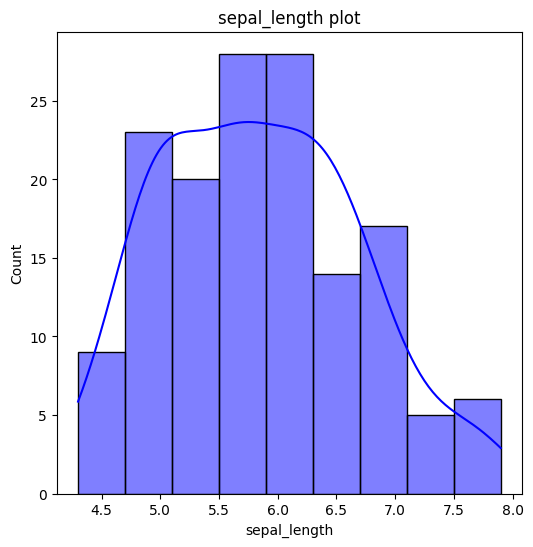

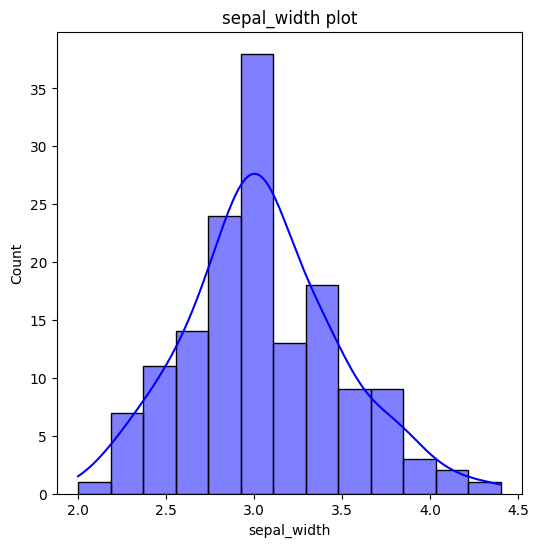

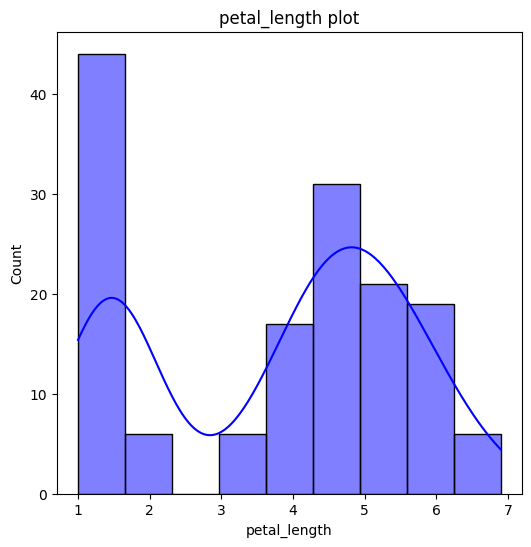

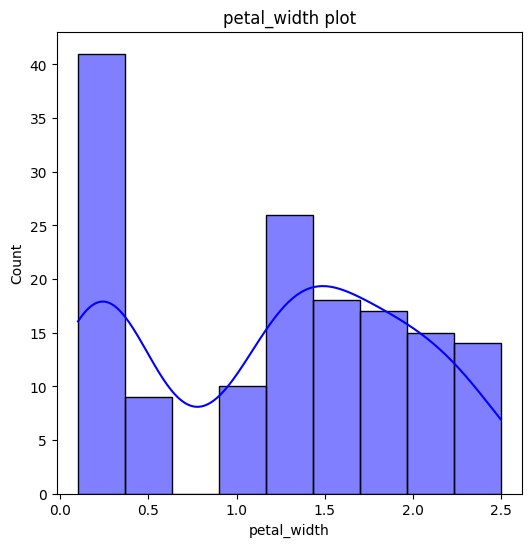

In [47]:
for i in df_num.columns :
    plt.figure(figsize=(6,6))
    sns.histplot(df_num[i],color='blue',kde='True')
    plt.title(f'{i} plot')
    plt.show()

In [48]:
print(df_cat['species'].unique())
print(df['species'].value_counts())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [49]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
df['species'] = Encoder.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [50]:
pd.pivot_table(df,index='species',values=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

,petal_length,petal_width,sepal_length,sepal_width
species,,,,
0,1.464,0.244,5.006,3.418
1,4.260,1.326,5.936,2.770
2,5.552,2.026,6.588,2.974


<Axes: >

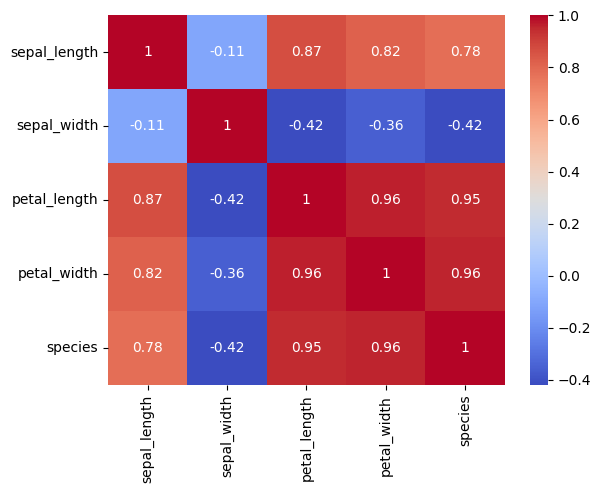

In [51]:
Corr_matrix = df.corr()
sns.heatmap(Corr_matrix,annot=True,cmap='coolwarm')

In [52]:
print(df.describe().round(1))

       sepal_length  sepal_width  petal_length  petal_width  species
count         150.0        150.0         150.0        150.0    150.0
mean            5.8          3.1           3.8          1.2      1.0
std             0.8          0.4           1.8          0.8      0.8
min             4.3          2.0           1.0          0.1      0.0
25%             5.1          2.8           1.6          0.3      0.0
50%             5.8          3.0           4.4          1.3      1.0
75%             6.4          3.3           5.1          1.8      2.0
max             7.9          4.4           6.9          2.5      2.0


In [53]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
0,5.006,3.418,1.464,0.244
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


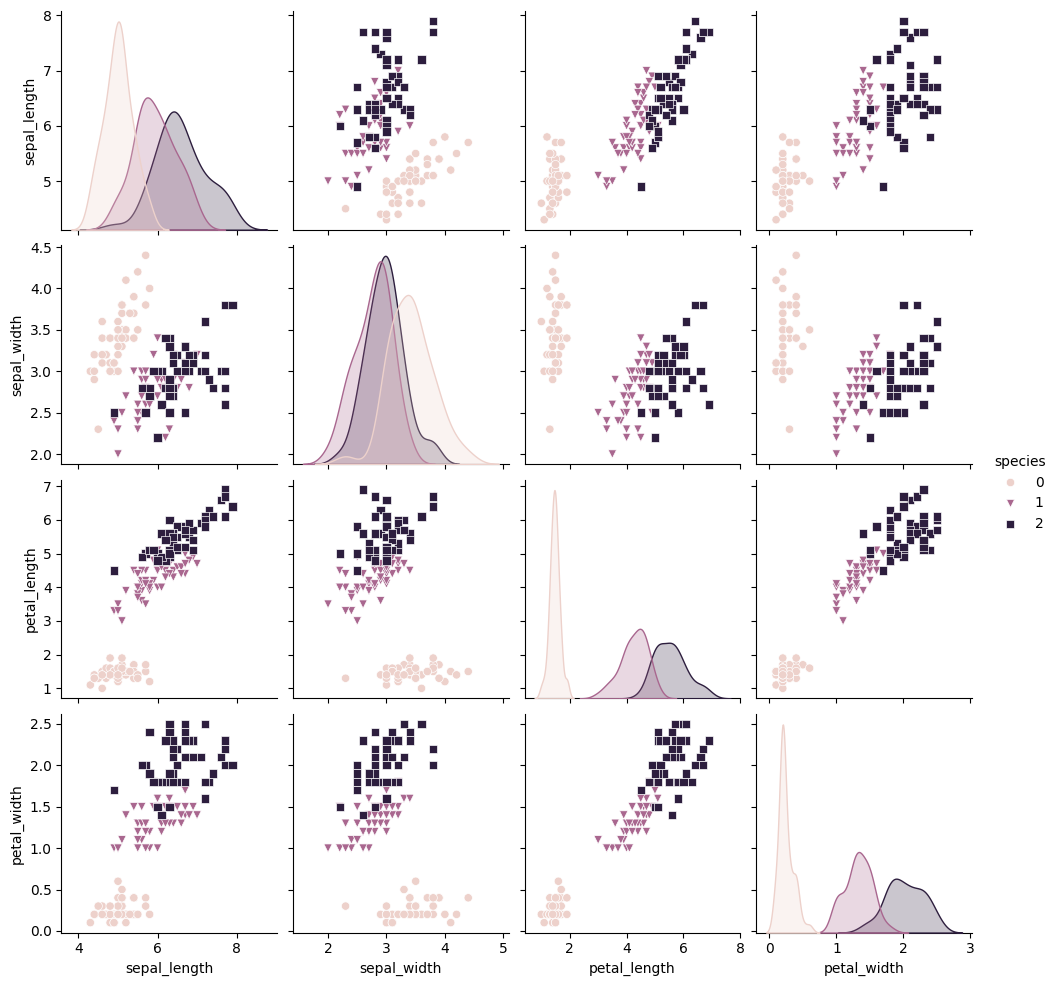

In [54]:
sns.pairplot(df,hue='species',markers=['o','v','s'])
plt.show()

In [55]:
from sklearn.metrics import accuracy_score,classification_report,r2_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBRFClassifier

In [56]:
X = df.drop(['species'],axis=1)
y = df['species']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [65]:
models = {
    'LogisticRegression' : LogisticRegression(),
    'Decision tree' : DecisionTreeClassifier(),
    'KNeighbors' : KNeighborsClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Support vector machine' : SVC(),
}

In [66]:
for name, model in models.items() :
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    print(f'performance of the model {name} :')
    print('Accuracy :',accuracy_score(y_test,y_pred))
    cross_val_score(model,X_train_scaled,y_train,cv=8)
    print('Mean of cross validation : ',cross_val_score(model,X_train_scaled,y_train,cv=10).mean())
    print('classification report : ',classification_report(y_test,y_pred))
    print('-' * 55)

performance of the model LogisticRegression :
Accuracy : 0.9666666666666667
Mean of cross validation :  0.9333333333333332
classification report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

-------------------------------------------------------
performance of the model Decision tree :
Accuracy : 1.0
Mean of cross validation :  0.9166666666666666
classification report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg   